<a href="https://colab.research.google.com/github/feliperecker/MVP/blob/main/MVP_Engenharia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP

### A influência dos trophy hunters no preço dos jogos de PlayStation

### Felipe Coelho Recker Rabello

## **Objetivo**

### Definição do Problema

* **Objetivo:** O objetivo deste MVP é investigar se a presença e a quantidade de troféus em jogos de PlayStation influenciam seu preço. Muitos jogadores, conhecidos como “trophy hunters”, priorizam jogos que oferecem um grande número de troféus ou troféus fáceis de conseguir. Nossa hipótese é que jogos com mais troféus (especialmente troféus raros como Platinum e Gold) podem ter preços mais altos devido ao seu apelo entre esse público.

* **Motivação:** Compreender essa relação pode ser útil para desenvolvedoras, publishers e revendedoras ao estabelecer estratégias de precificação, promoções e até mesmo no design dos jogos.

---

### Perguntas

* Jogos com mais troféus custam mais caro?
* A presença de troféus raros (Platinum e Gold) afeta o preço de um jogo?
* Jogos com mais conquistas desbloqueadas têm preços maiores?
* Gêneros com alta quantidade de troféus apresentam preços mais altos?
* Existem gêneros com jogos desenvolvidos especialmente para trophy hunters?
---



## **Busca pelos dados**

Essa etapa mostra o processo realizado para a seleção dos dados

### Dataset

Para garantir uma análise sólida sobre a influência dos trophy hunters no preço dos jogos, iniciei um processo de busca por bases de dados relevantes. Meu objetivo era encontrar informações detalhadas sobre jogos, troféus, preços e o comportamento dos jogadores ao longo do tempo.

Durante essa etapa, identifiquei a base "Gaming Profiles 2025 (Steam, PlayStation, Xbox)", disponível no Kaggle.

link: https://www.kaggle.com/datasets/artyomkruglov/gaming-profiles-2025-steam-playstation-xbox

Após a análise, salvei a base de dados em uma pasta no meu computador para utilização no projeto.

---

### Descrição


A base "Gaming Profiles 2025" é composta por diferentes arquivos CSV, organizados em tabelas que representam aspectos distintos do ecossistema dos jogos digitais, com foco em plataformas como PlayStation, Steam e Xbox. Para este projeto, será filtrado apenas as informações relacionados à plataforma PlayStation, por serem mais relevantes à análise proposta.

Abaixo está uma descrição dos arquivos utilizados:

* Arquivo ***achievements.csv***

Contém as conquistas (troféus) disponíveis em cada jogo. Cada linha representa um troféu individual:

* ***achievementid:*** identificador único da conquista
* ***gameid:*** identificador do jogo ao qual o troféu pertence
* ***title:*** nome da conquista
* ***description:*** descrição da conquista
* ***rarity:*** tipo de troféu (ex: bronze, prata, ouro, platina)




* Arquivo ***games.csv***

Contém informações detalhadas sobre cada jogo disponível na plataforma PlayStation:

* ***gameid:*** identificador único do jogo
* ***title:*** nome do jogo
* ***platform:*** plataforma de lançamento (PS4, PS5, etc.)
* ***developers:*** empresa que desenvolveu o jogo
* ***publishers:*** empresa que publicou o jogo
* ***genres:*** gêneros associados ao jogo
* ***supported_languages:*** Idiomas do jogo
* ***release_date:*** data de lançamento




* Arquivo ***history.csv***

Traz o histórico de conquistas desbloqueadas pelos jogadores ao longo do tempo:

* ***player_id:*** jogador que conquistou o troféu
* ***achievement_id:*** identificador da conquista
* ***date_acquired:*** data em que o troféu foi conquistado



* Arquivo ***players.csv***

Representa o perfil dos jogadores da plataforma. Cada linha descreve um jogador específico:

* ***player_id:*** identificador único do jogador
* ***nickname:*** apelido do jogador
* ***country:*** país de origem

* Arquivo ***prices.csv***

Registra o valor dos jogos em diferentes moedas e datas:

* ***gameid:*** identificador do jogo
* ***usd, eur, gbp, jpy, rub:*** preços do jogo em diferentes moedas
* ***date_acquired:*** data da coleta do preço




## **Armazenamento em nuvem**

Essa etapa consiste em mostrar o passo a passo do armazenamento dos arquivos na nuvem

### Coleta de Dados

Após definir o conjunto de dados necessário para a análise, a etapa seguinte consistiu em estruturar uma solução de armazenamento que garantisse acesso rápido, segurança e escalabilidade para os dados utilizados no projeto.

Para isso, optei por utilizar o Microsoft Fabric, mais especificamente a arquitetura Lakehouse, como repositório central dos arquivos na nuvem. Essa escolha se deu por diversos fatores, como a integração nativa com ferramentas do ecossistema Microsoft (como Power BI e notebooks do Fabric), além do suporte eficiente a grandes volumes de dados e diferentes formatos.

Para viabilizar a comunicação entre meus arquivos locais e o lakehouse na nuvem, configurei um gateway de dados no meu computador. Esse gateway permite a leitura e atualização automática das tabelas armazenadas localmente, garantindo que os dados estejam sempre atualizados no ambiente de trabalho remoto.

🖼️ Abaixo, segue um print ilustrando o gateway configurado no meu ambiente local:



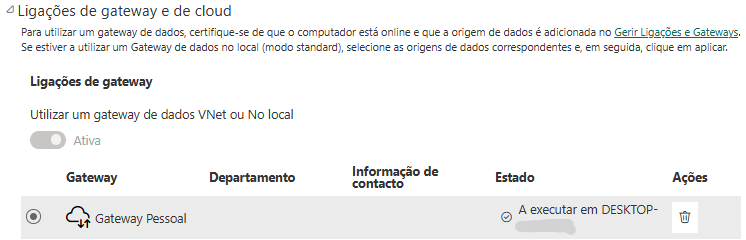

### Criação dos fluxos de dados

Com o gateway devidamente configurado, foi possível criar fluxos de dados no Microsoft Fabric para automatizar o carregamento das tabelas utilizadas no projeto.

Esses fluxos são responsáveis por:
* Estabelecer a conexão entre os arquivos locais e o ambiente de nuvem;
* Realizar a leitura e transformação inicial dos dados;
* Inserir as tabelas no data lakehouse.

A criação dos fluxos garantiu que cada tabela fosse corretamente importada e armazenada como uma tabela delta no lakehouse, o que permite consultas otimizadas via SQL, além de possibilitar transformações futuras dentro do próprio Microsoft Fabric.

🖼️ Abaixo estão os prints dos fluxos de dados criados e da estrutura final do lakehouse com as tabelas carregadas:

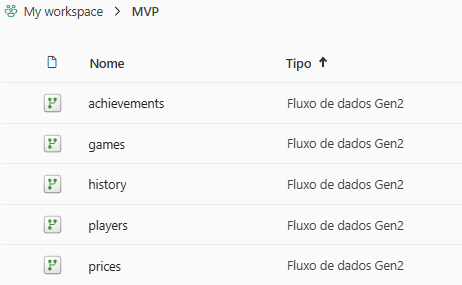

### Criação da tabela data

Com as tabelas principais carregadas no lakehouse, iniciei a construção de uma tabela de datas, que servirá como a dimensão temporal do meu modelo estrela.

Para isso, criei um notebook em Python dentro do próprio Microsoft Fabric, onde desenvolvi um script para gerar uma tabela "Calendário" com datas que vão de 1º de janeiro de 2015 até 31 de dezembro de 2025. Essa tabela inclui colunas auxiliares como:

* Data
* Ano-Mês
* Ano
* Mês

Essa dimensão é fundamental para permitir análises temporais, como variação de preços ao longo do tempo ou picos de atividade dos trophy hunters em determinadas épocas do ano.

🖼️ Abaixo está um print do notebook Python utilizado para gerar a tabela Calendário:

In [ ]:
import pandas as pd
import pyspark.pandas as ps

# 1. Criar a sequência de datas de 01/01/2015 até 31/12/2025
datas = pd.date_range(start='2015-01-01', end='2025-12-31', freq='D')

# 2. Criar o DataFrame com as colunas desejadas
df_datas = pd.DataFrame({
    'Data': datas,
    'AnoMes': datas.strftime('%Y-%m'),
    'Ano': datas.year,
    'Mes': datas.month
})

# 3. Converter o DataFrame pandas para pyspark.pandas
ps_df = ps.from_pandas(df_datas)

# 4. Gravar no Lakehouse como tabela (dentro da aba Tables)
ps_df.to_table(name="Calendario", mode="overwrite")

### Criação do Data Lakehouse

Após a execução do notebook, a tabela Calendário foi carregada no lakehouse, completando assim o conjunto de tabelas necessárias para a construção do modelo analítico.

🖼️ Abaixo está um print do lakehouse com todas as tabelas já carregadas:

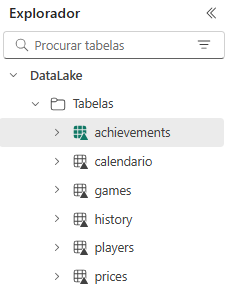

## **Modelagem e Transformação**

O objetivo dessa etapa é preparar os dados brutos para compor um data warehouse limpo e padronizado.

### Descrição

Com os dados devidamente armazenados no lakehouse, iniciei a etapa de transformação e modelagem, preparando as tabelas para compor um data warehouse estruturado e otimizado para análise.

Todas as transformações serão realizadas por meio do Power Query no Microsoft Fabric, o que oferece uma interface visual poderosa, mantendo a rastreabilidade das etapas e facilitando ajustes.

Essa etapa é essencial para:

* Aplicar filtros e limpezas necessárias;
* Padronizar colunas e tipos de dados;
* Preparar as dimensões e a tabela fato para o modelo final.

---

### Estratégia adotada

#### Descrição

As transformações foram organizadas por tabela, com o objetivo de separar claramente as dimensões e a tabela fato do projeto. Abaixo está o planejamento e transformações realizadas:

#### Dimenções

##### dim_achievements

###### Descrição

A primeira tabela tratada no processo de modelagem foi a tabela de *achievements*, que dará origem à dimensão *dim_achievements*. Essa tabela é responsável por armazenar informações sobre os troféus disponíveis em cada jogo da base de dados.

---

###### Transformações Realizadas

As transformações foram feitas por meio do seguinte passo a passo no Power Query:

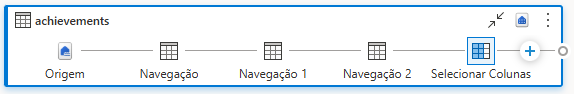

As principais ações executadas foram:

* Conexão com o lakehouse do Microsoft Fabric, garantindo que a consulta seja vinculada diretamente à fonte de dados oficial do projeto;

* Seleção das colunas relevantes para a análise: *achievementid*, *gameid* e *rarity*;

* Remoção de colunas desnecessárias como *title* e *description*, que não agregariam valor direto ao objetivo do projeto e apenas aumentariam o volume de dados processados.

Resultado final da tabela no Data Warehouse:

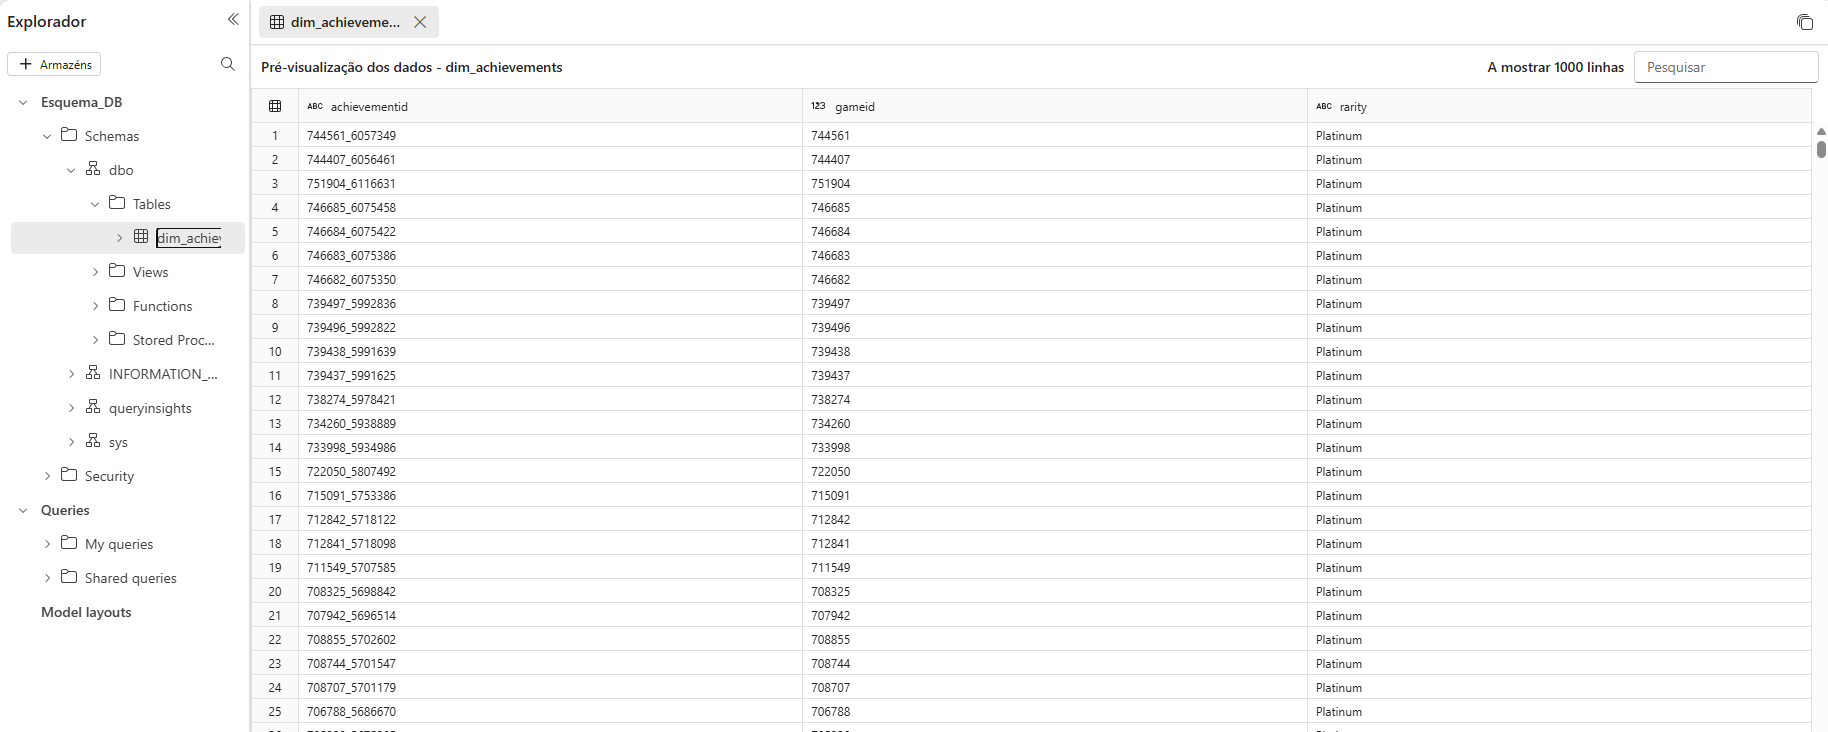

##### dim_games

###### Descrição

A tabela *games* deu origem a dimensão *dim_games*. Nela contém os atributos dos jogos analisados no projeto. Essa dimensão será de extrema importância para relacionar os preços, conquistas e comportamento dos jogadores em torno de cada título da base de dados.

---

###### Transformações Realizadas

As transformações foram feitas por meio do seguinte passo a passo no Power Query:

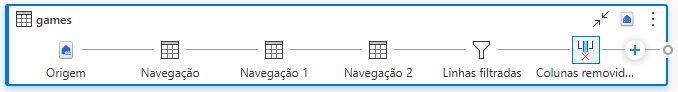

As principais ações executadas foram:

* Conexão com o lakehouse do Microsoft Fabric, garantindo que a consulta seja vinculada diretamente à fonte de dados oficial do projeto;

* Filtragem da plataforma para jogos de PS4 apenas, justificando-se pelo fato de ser a geração mais recente com ciclo completo. Isso garante uma base sólida e consistente de jogos, permitindo avaliar a relação entre troféus e preço mesmo anos após o lançamento de um jogo;

* Exclusão de colunas não utilizadas, como *supported_languages* (línguas suportadas) e *platform*, visto que todos os registros já foram filtrados para PS4.

Resultado final da tabela no Data Warehouse:

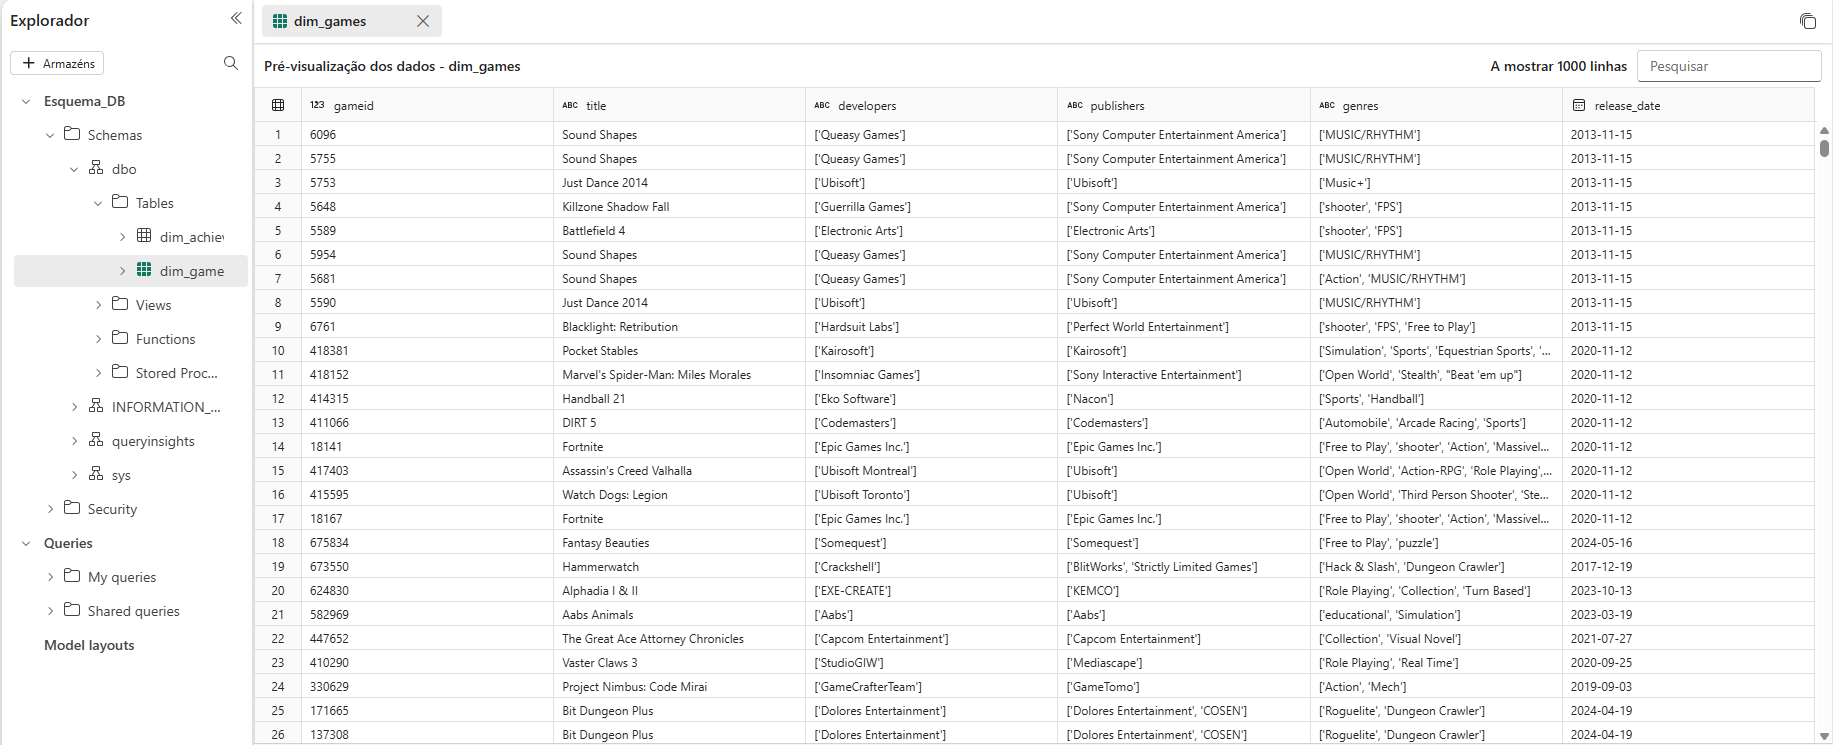

##### dim_history

###### Descrição

A tabela *history* vai dar origem a dimensão *dim_history*. Ela representa o registro histórico das conquistas desbloqueadas pelos jogadores ao longo do tempo. Essa tabela é fundamental para entender o comportamento dos trophy hunters, permitindo identificar padrões de engajamento e intensidade na busca por troféus.

---

###### Transformações Realizadas

Neste caso, nenhuma transformação foi necessária, pois a estrutura da tabela já estava adequada para sua utilização direta no modelo. O passo a passo utilizado apenas estabelece a conexão com o lakehouse, conforme exemplo abaixo:

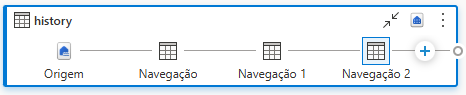

A dimensão *history* será usada como fato auxiliar na análise de engajamento dos jogadores com os jogos, permitindo cruzamentos com achievements, e players, além de possibilitar a criação de métricas temporais a partir da data da conquista.

Resultado final da tabela no Data Warehouse:

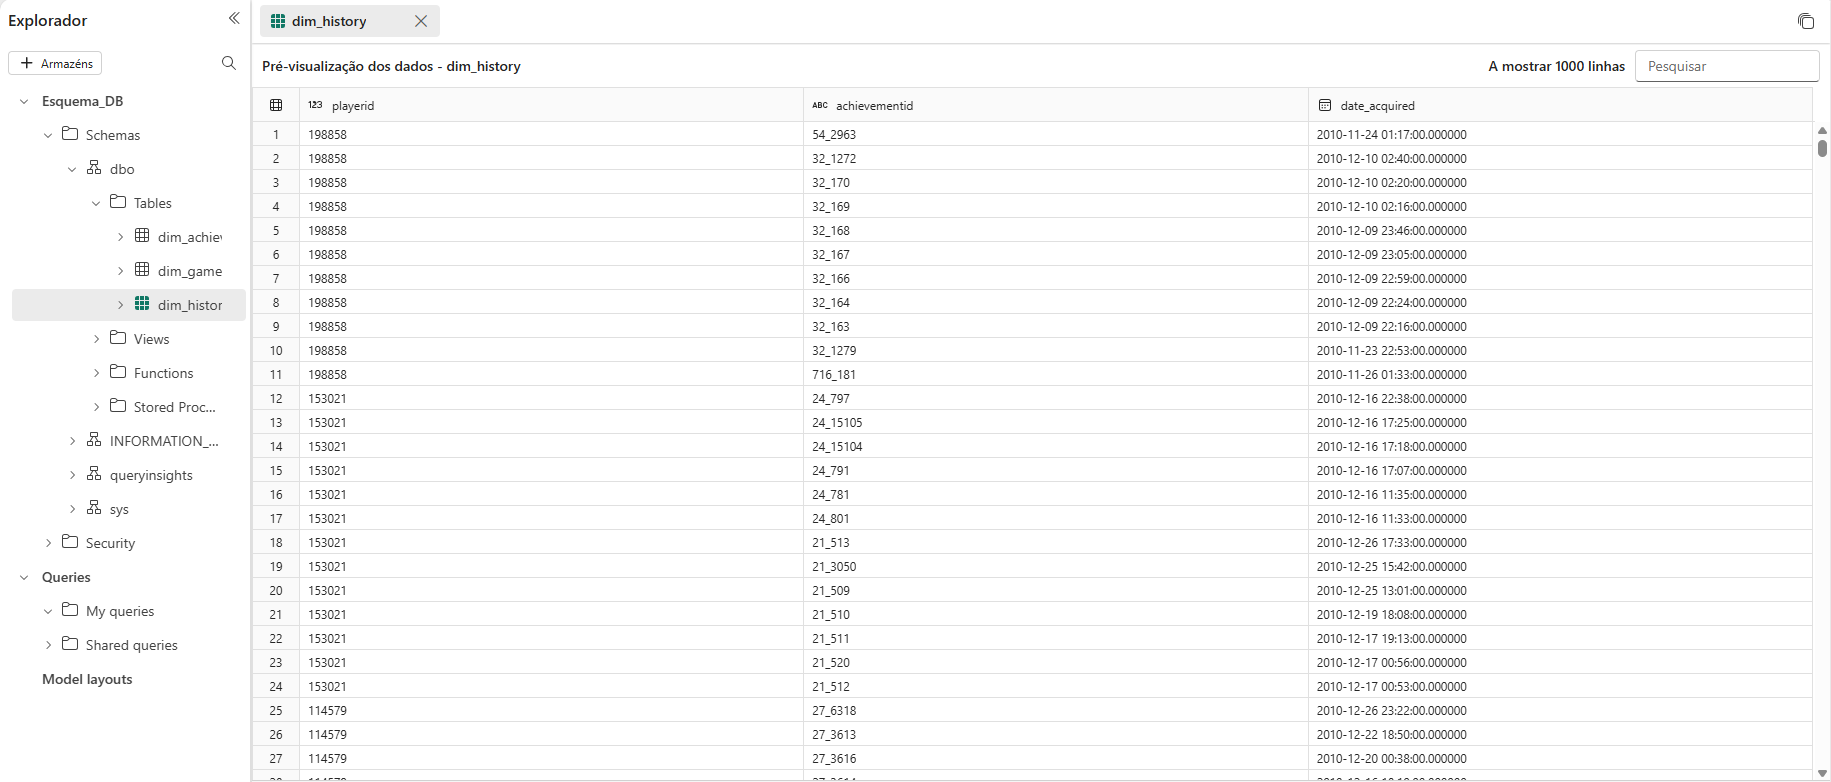

##### dim_players

###### Descrição

A tabela *players* vai dar origem a dimensão *dim_players*. Ela representa os perfis individuais dos jogadores presentes na base de dados.

---

###### Transformações Realizadas

Neste caso, nenhuma transformação foi necessária, pois a estrutura da tabela já estava adequada para sua utilização direta no modelo. O passo a passo utilizado apenas estabelece a conexão com o lakehouse, conforme exemplo abaixo:

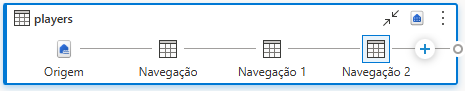

Essa dimensão será associada à tabela de histórico de conquistas (history) para análises por país e para identificar perfis de engajamento com base no número de conquistas desbloqueadas por região.

Resultado final da tabela no Data Warehouse:

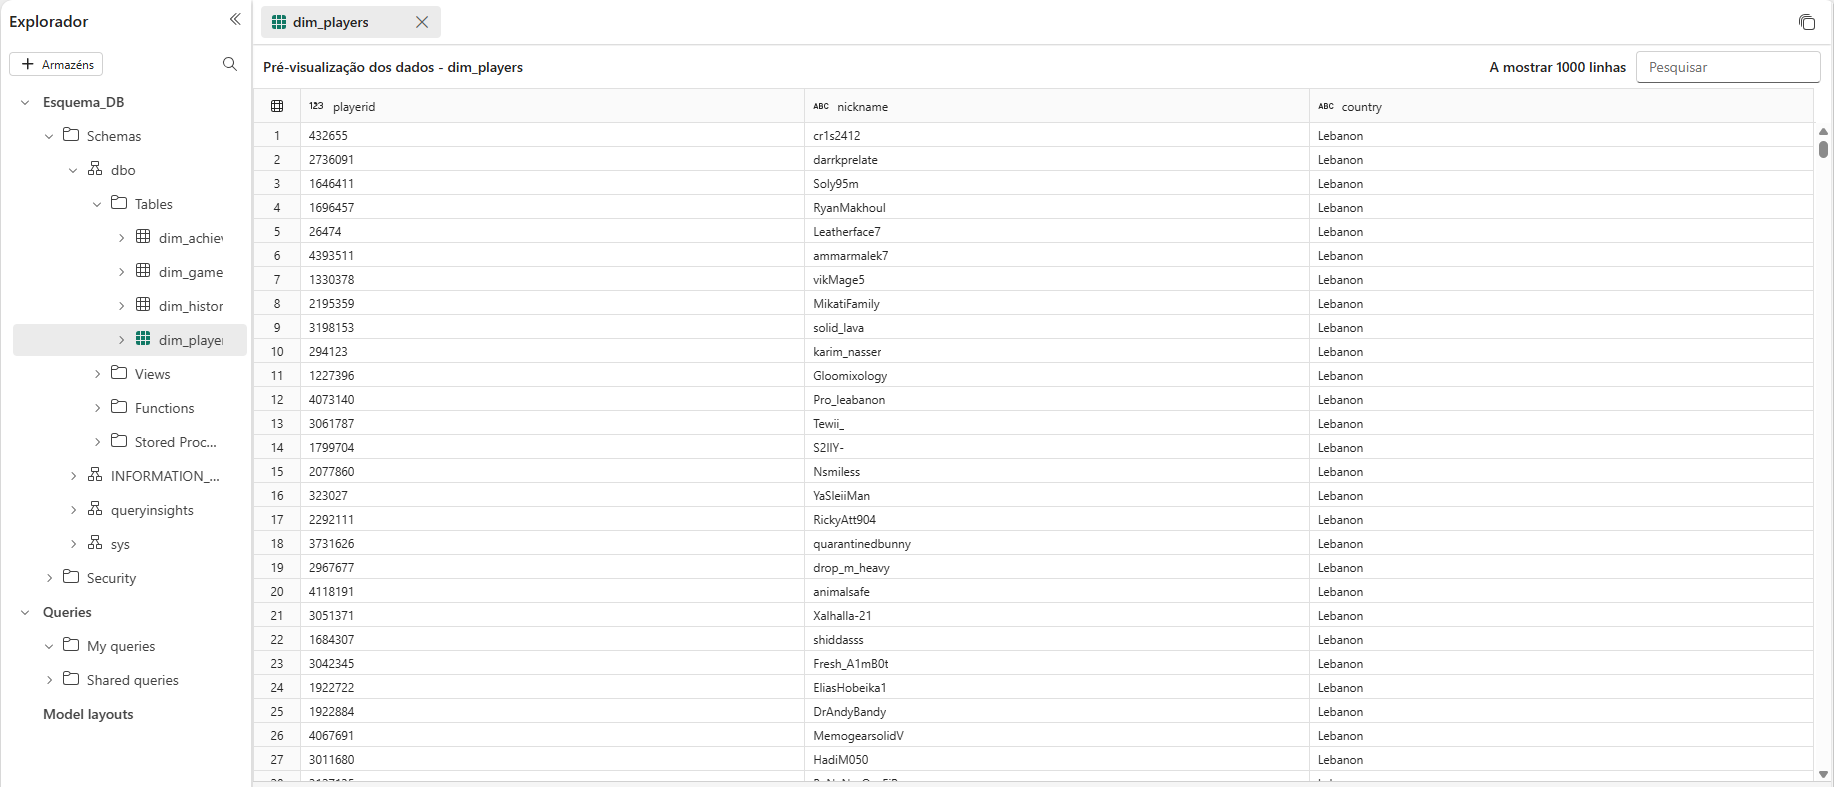

##### dim_data

###### Descrição

A dimensão *dim_data* é um componente essencial do modelo dimensional, pois permite realizar análises temporais e identificar sazonalidades.

---

###### Transformações Realizadas

Nenhuma transformação adicional foi necessária no Power Query, pois a tabela já foi construída com todas as colunas necessárias no momento da sua criação.

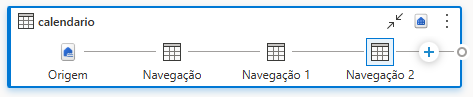

Essa dimensão será utilizada em conjunto com a tabela fato para análises por data de aquisição de jogos, desbloqueio de conquistas e evolução de métricas ao longo do tempo.

Resultado final da tabela no Data Warehouse:

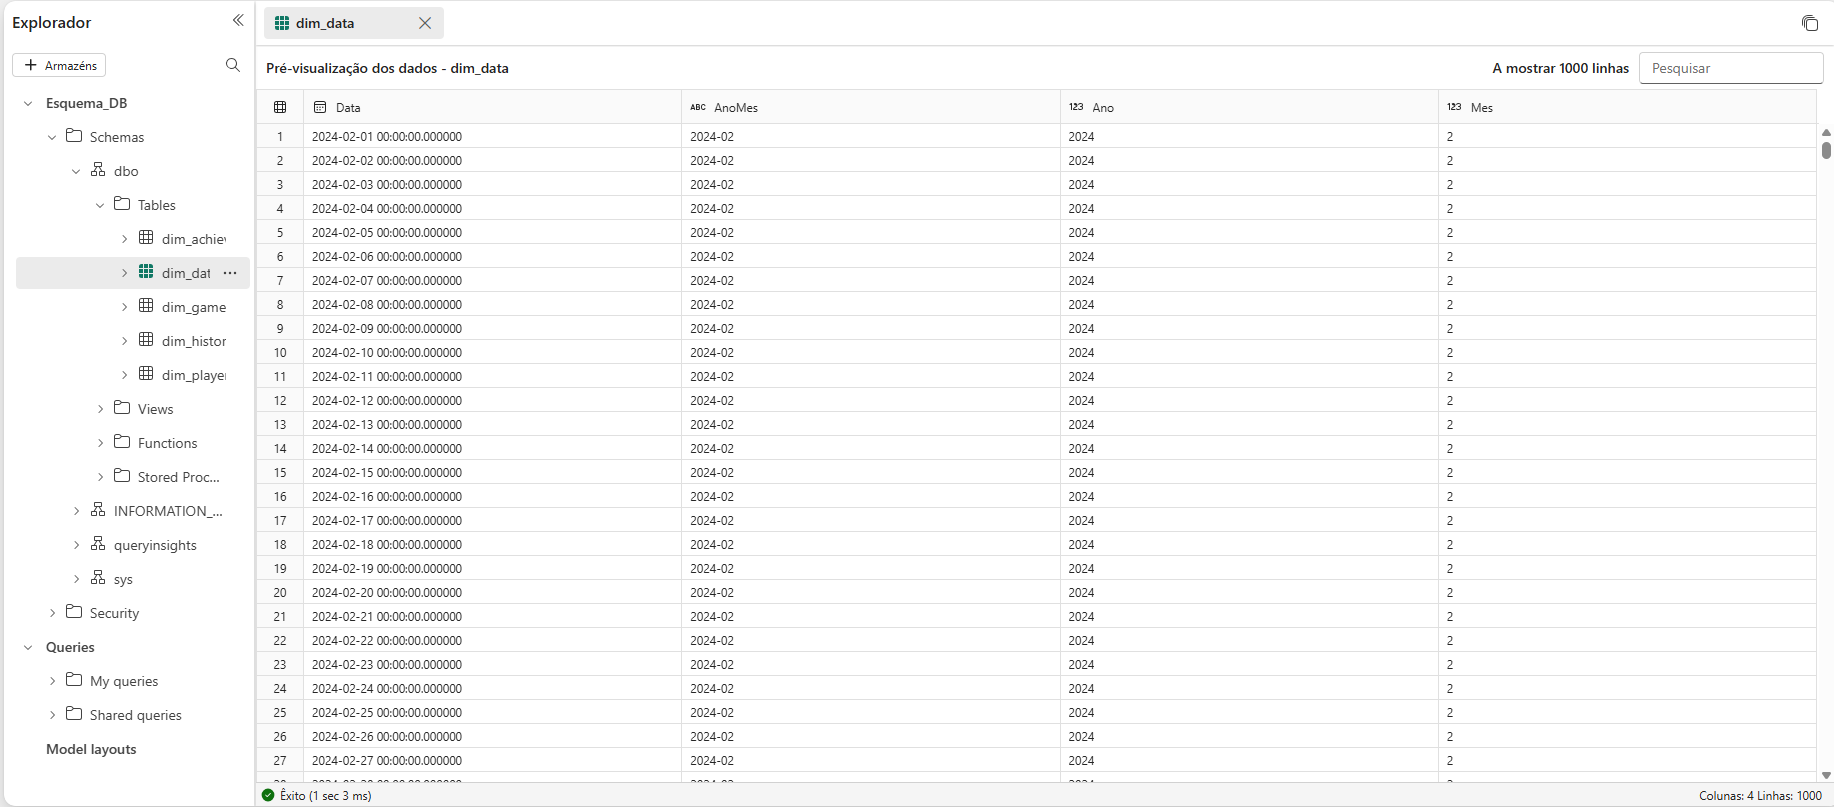

#### Tabela Fato

##### ft_prices

###### Descrição

A tabela fato concentra os principais indicadores que serão analisados no projeto, funcionando como o elo central entre as dimensões do modelo. Neste projeto, a tabela fato foi nomeada como *ft_prices*, e tem como foco a relação entre o preço dos jogos e o comportamento dos trophy hunters.

---

###### Transformações Realizadas

O tratamento colocou em foco a coluna usd como valor de referência para os preços dos jogos. O tratamento realizado teve como objetivo preparar os dados para garantir a consistência das análises de preços. Abaixo está o passo a passo construído no Power Query:

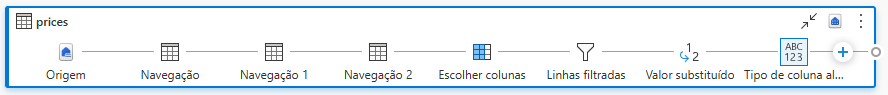

As etapas aplicadas foram:

* Conexão com o lakehouse para acesso à tabela de preços;

* Seleção das colunas relevantes: *gameid*, *usd* (valor em dólar) e *date_acquired* (data de aquisição);

* Remoção de registros com valores nulos ou vazios na coluna usd, garantindo a integridade dos dados utilizados para análise de preços.

* Substituição do ponto (.) por vírgula (,) como separador decimal, adaptando os dados ao padrão regional do Power BI/Power Query;

* Conversão do tipo da coluna *usd* para número decimal, possibilitando o uso em agregações, comparações e visualizações numéricas.

Resultado final da tabela no Data Warehouse:

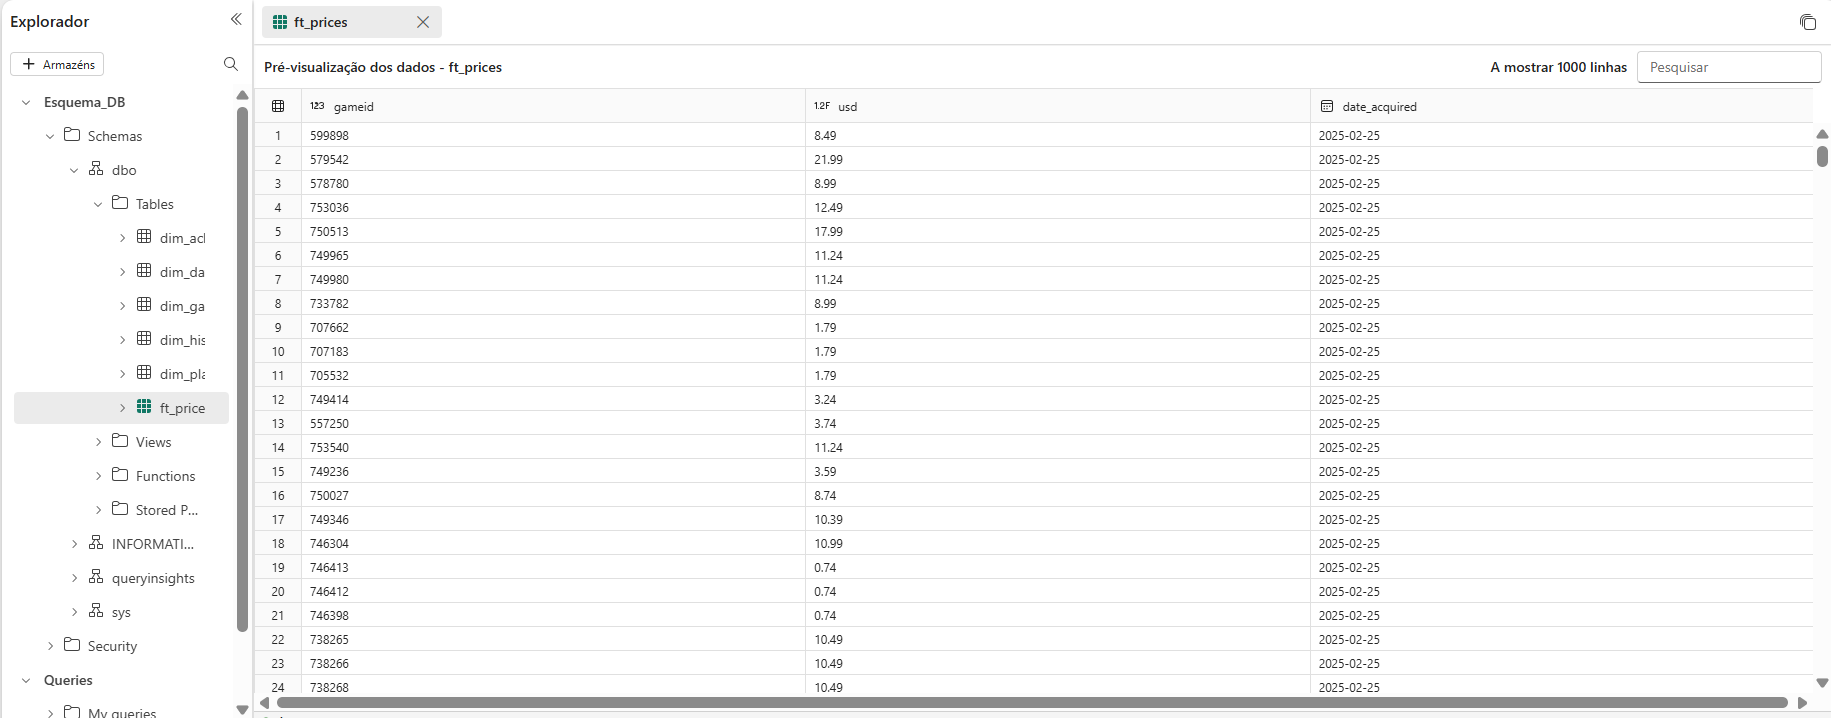

### Carga no Data Warehouse

#### Descrição

Após a realização das transformações e limpezas dos dados, o modelo dimensional foi estruturado seguindo o formato estrela, com uma tabela fato central de preços e diversas dimensões associadas que enriquecem a análise.

A tabela *ft_prices* representa o núcleo do modelo, armazenando os preços dos jogos ao longo do tempo. Ela é conectada diretamente às dimensões de jogos (*dim_games*) e tempo (*dim_data*), possibilitando análises como a variação de preços por período, por gênero, ou por desenvolvedor.

Além disso, a tabela *dim_history* foi incorporada ao projeto como uma fato auxiliar. Ela registra o comportamento dos jogadores em relação às conquistas desbloqueadas e permite análises complementares sobre o engajamento dos usuários com os jogos. Por meio dela, é possível derivar métricas como o volume de troféus desbloqueados por data ou por jogo, que podem ser cruzadas com as informações da tabela principal de preços.

#### Datamart

1. ***dim_achievements*** - Contém informações sobre os troféus dos jogos.
* Chave primária: *achievementid*
* Colunas: *achievementid*, *gameid*, *rarity*

2. ***dim_data*** - Tabela de calendário com informações temporais.
* Chave primária: Data
* Colunas: Data, AnoMes, Ano, Mes

3. ***dim_games*** - Contém os detalhes dos jogos.
* Chave primária: *gameid*
* Colunas: *gameid*, *title*, *developers*, *publishers*, *genres*, *release_date*

4. ***dim_history*** - Histórico de conquistas desbloqueadas pelos jogadores.
* Chave composta: *playerid* + *achievementid* + *data_acquired*
* Colunas: *playerid*, *achievementid*, *data_acquired*

5. ***dim_players*** - Informações sobre os jogadores.
* Chave primária: *playerid*
* Colunas: *playerid*, *nickname*, *country*

7. ***ft_prices*** - Tabela fato com os preços dos jogos.
* Chave composta: *gameid* + *data_acquired*
* Colunas: *gameid*, *usd*, *data_acquired*

#### Modelo Estrela

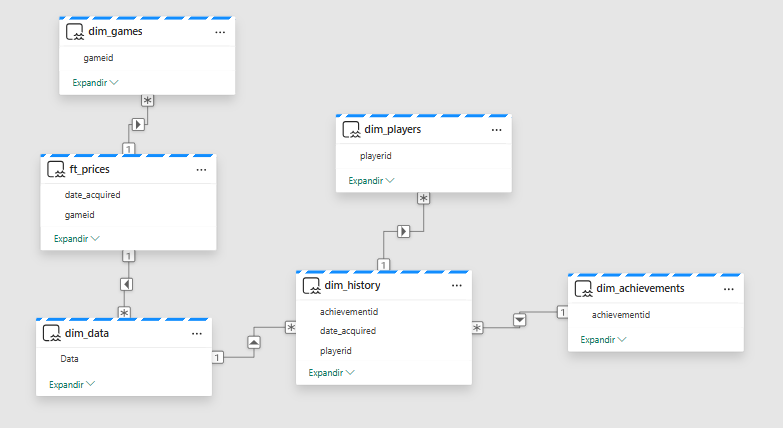

## **Análise Final**

O objetivo dessa etapa é analisar o resultado final do que foi desenvolvido no projeto.

### Qualidade dos dados

#### Descrição

Após o processo completo de ETL e inserção dos dados no data warehouse, foi realizada uma verificação da integridade e consistência de cada atributo presente nas tabelas do modelo dimensional.

Durante essa etapa, não foram identificados problemas relevantes nos conjuntos de dados já carregados no ambiente final. As possíveis inconsistências ou ruídos nos dados foram identificados e resolvidos previamente na fase de estratégia de modelagem e transformações, realizada por meio do Power Query no Microsoft Fabric.


#### Validação de qualidade dos dados via SQL

##### 1. Checagem de valores nulos em colunas críticas


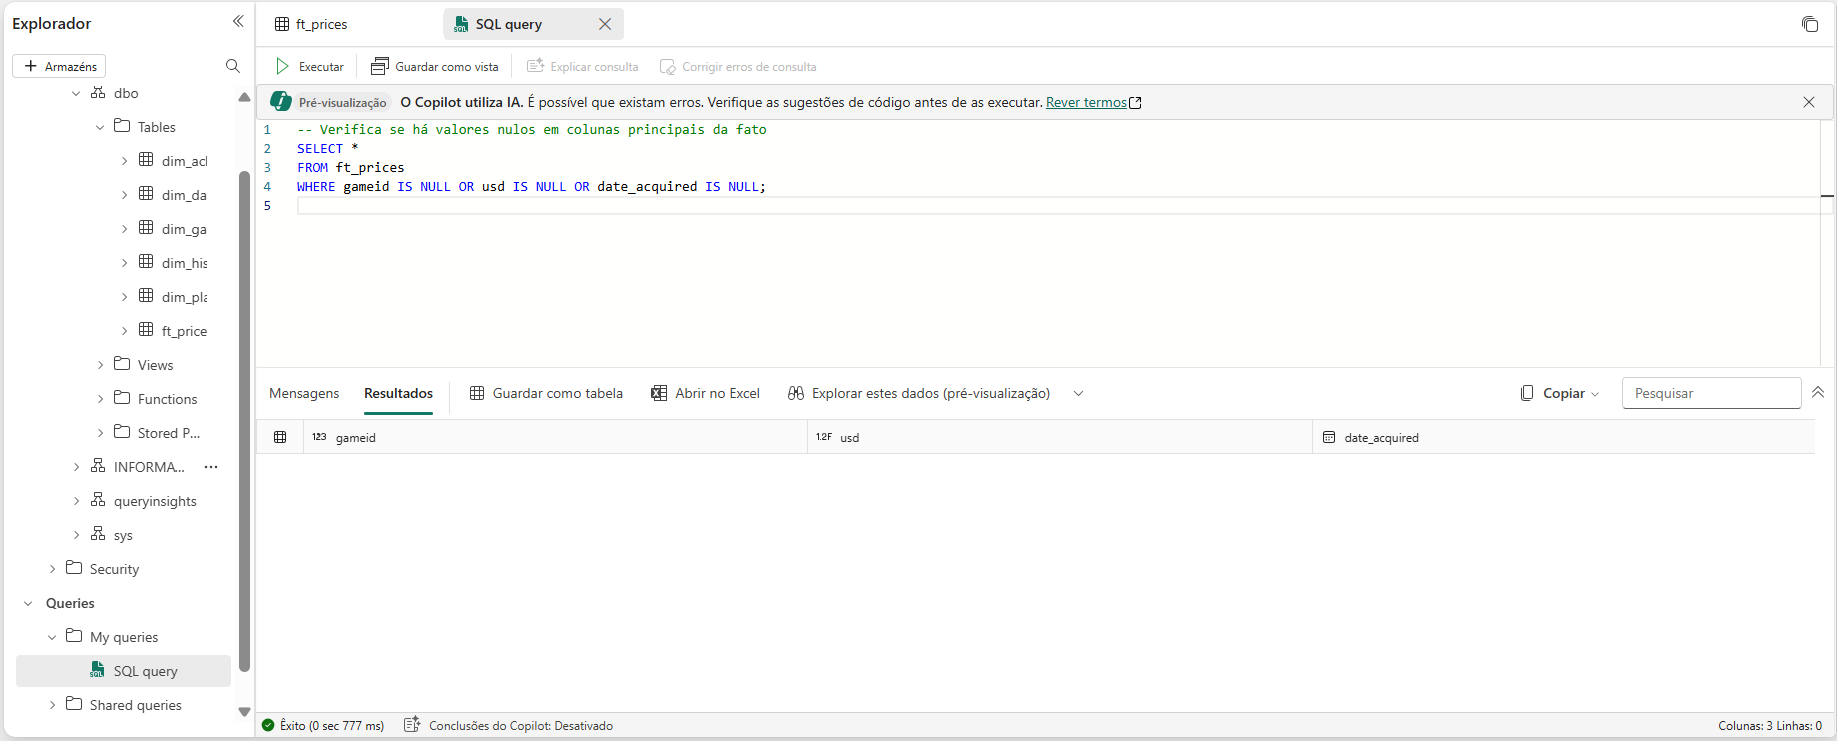

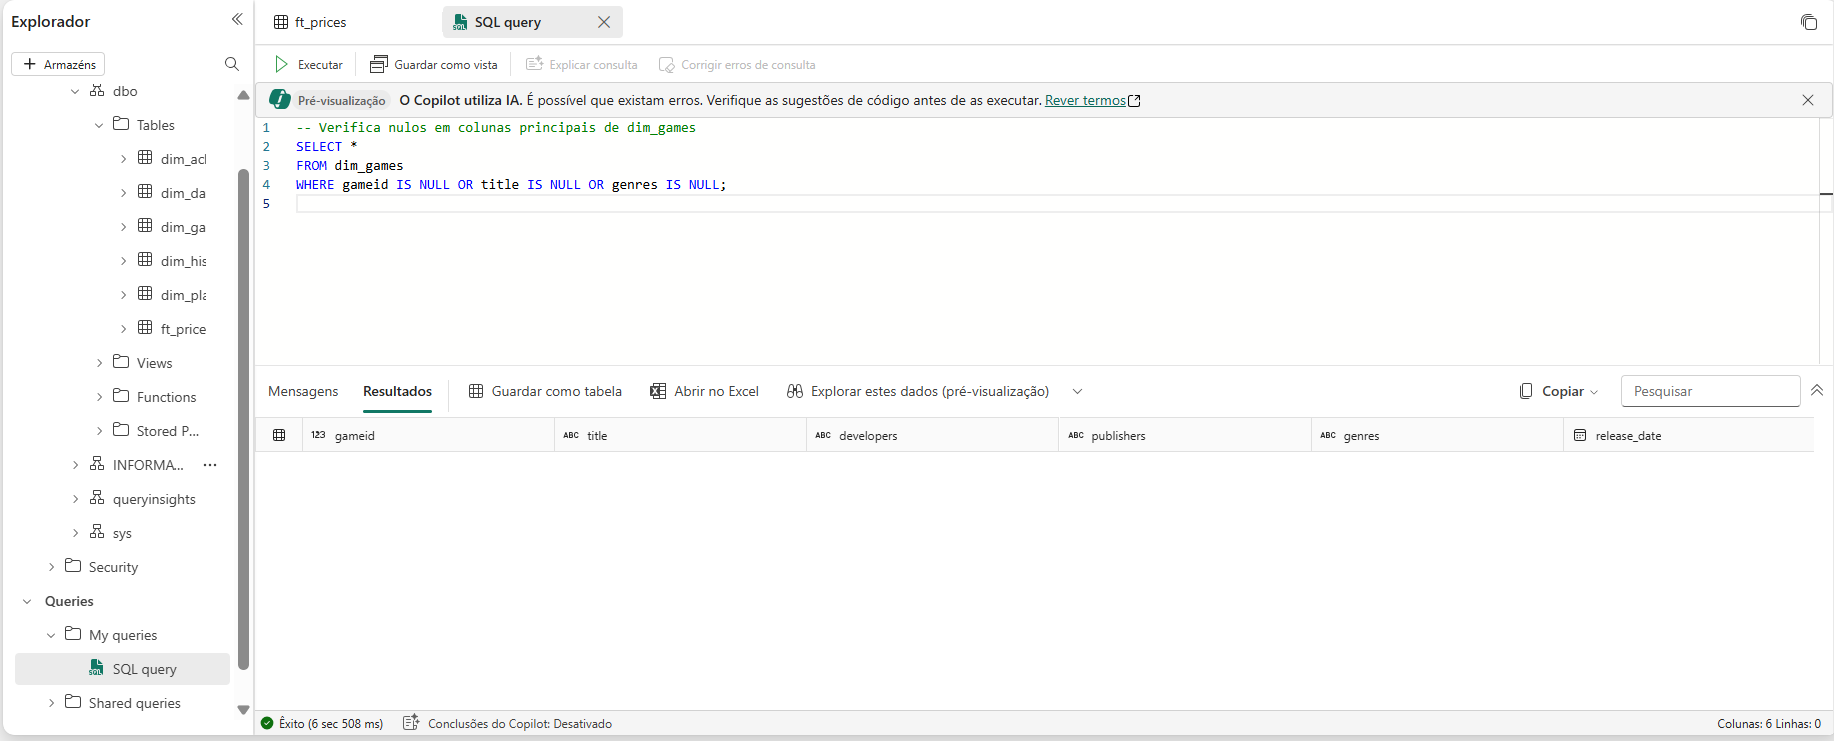

2. Contagem de registros com problemas ou vazios


##### 2. Contagem de registros com problemas ou vazios


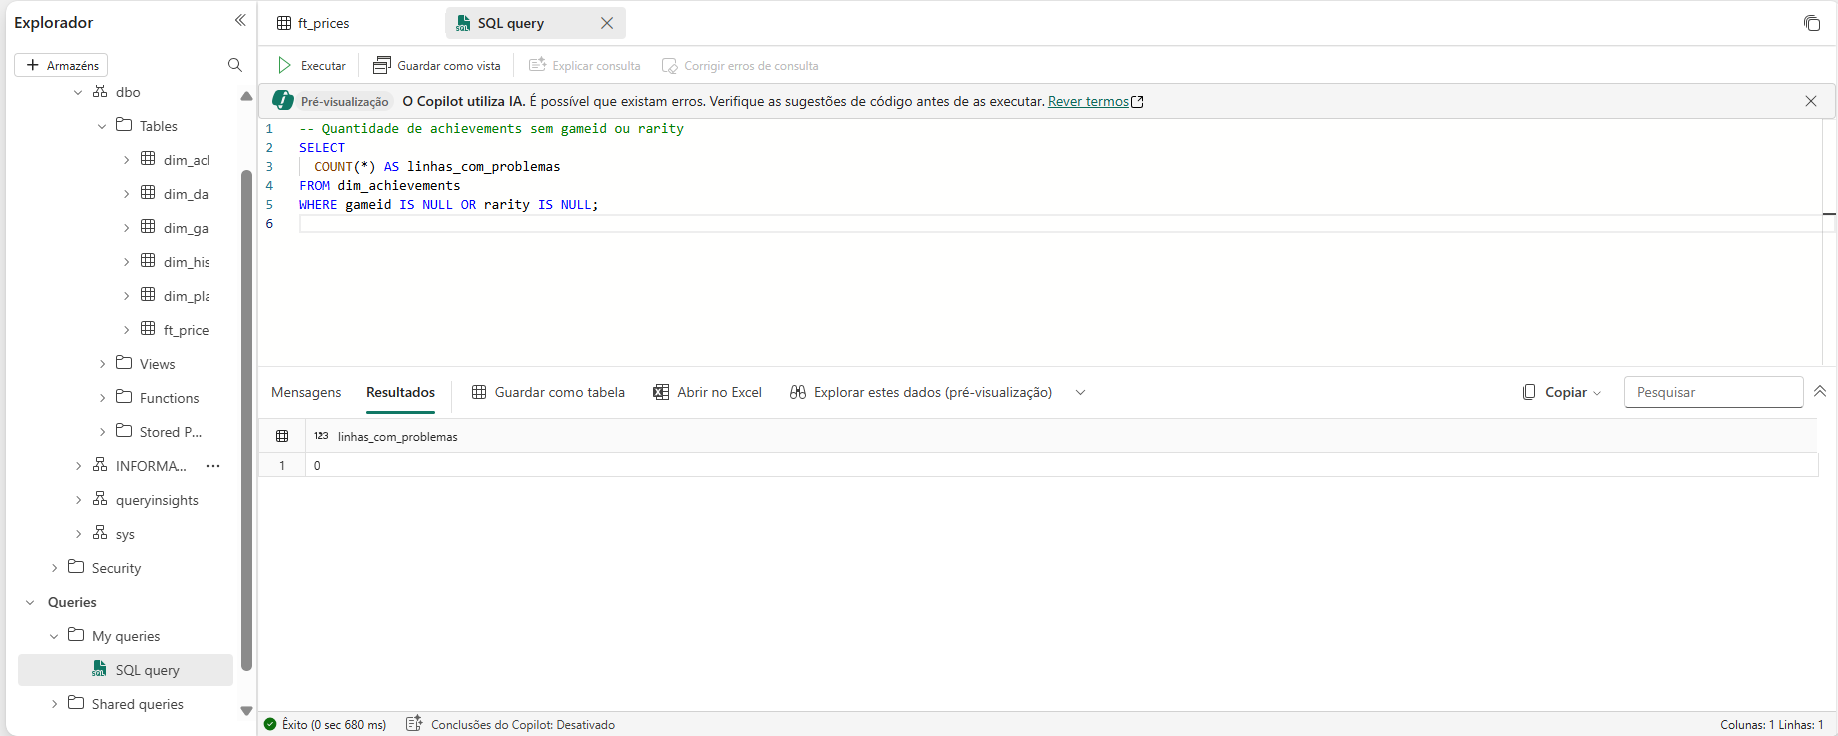

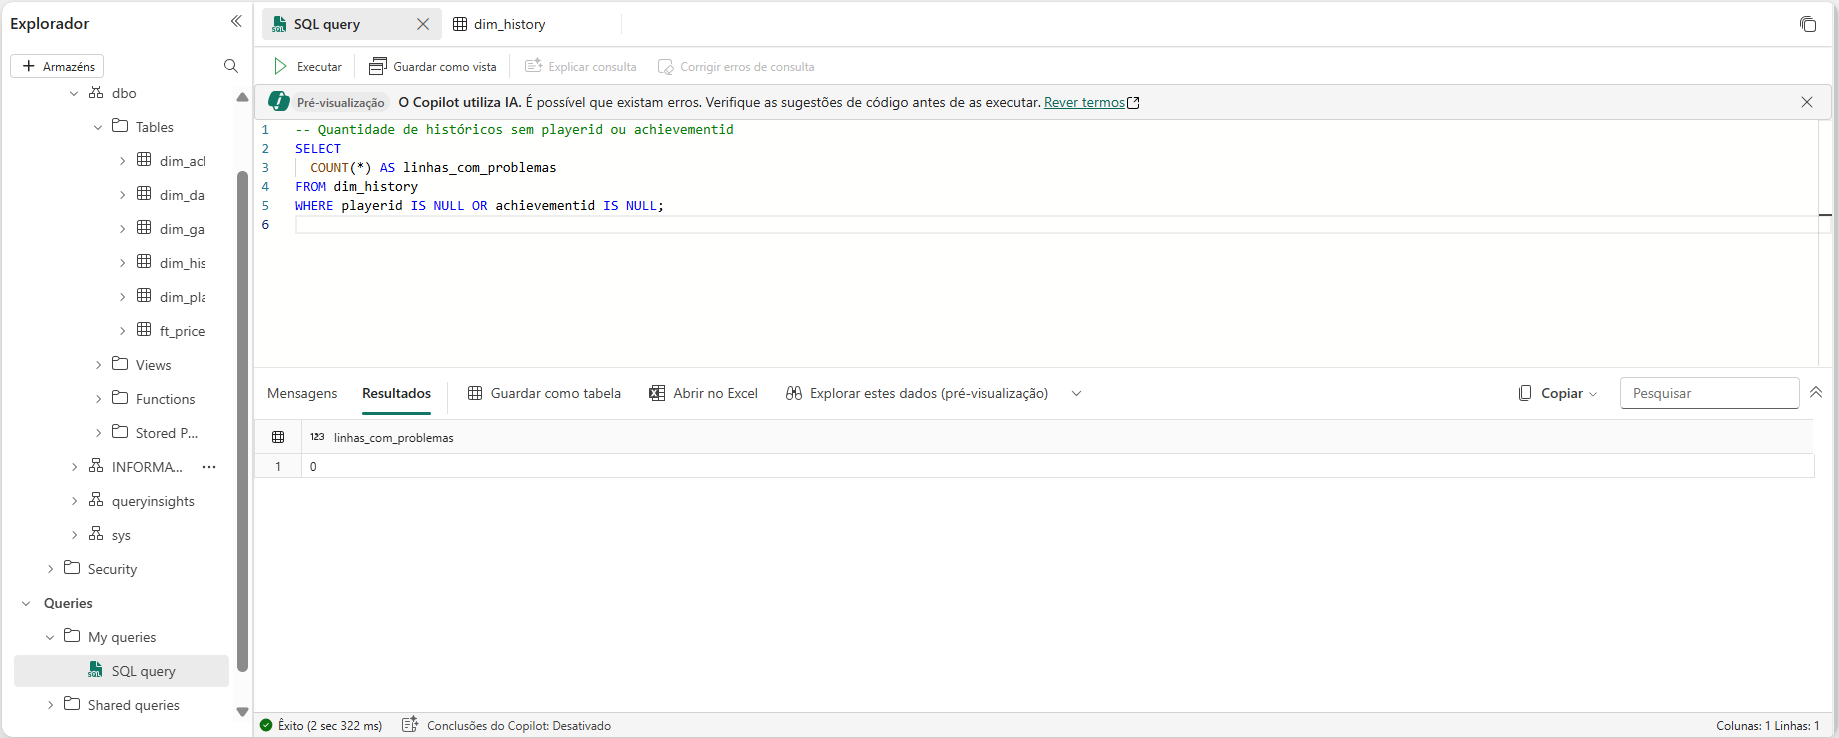

2. Contagem de registros com problemas ou vazios


##### 3. Checagem de valores duplicados


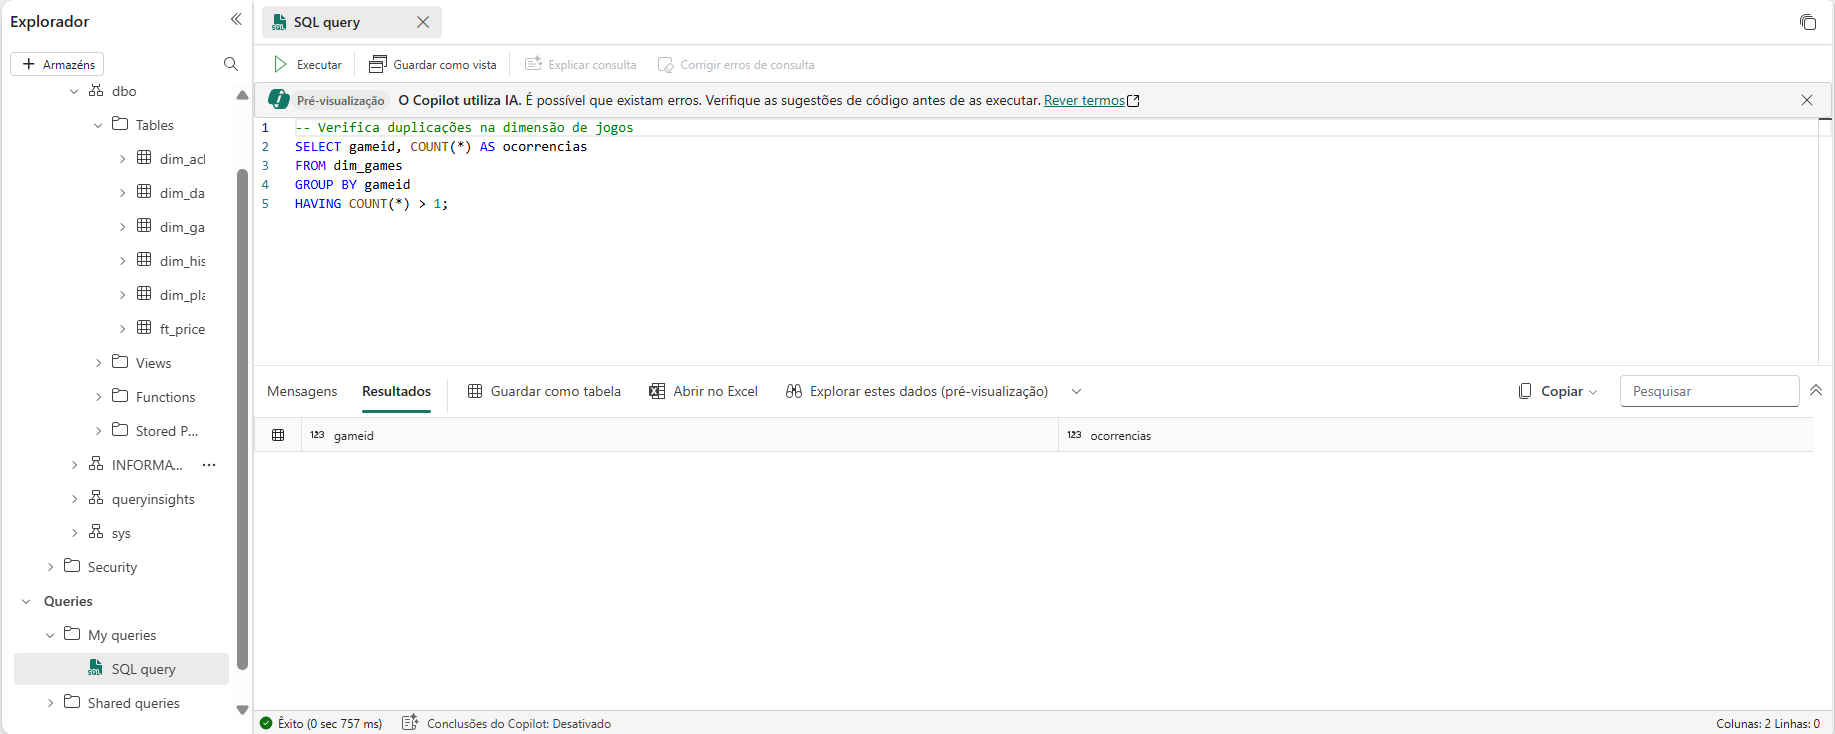

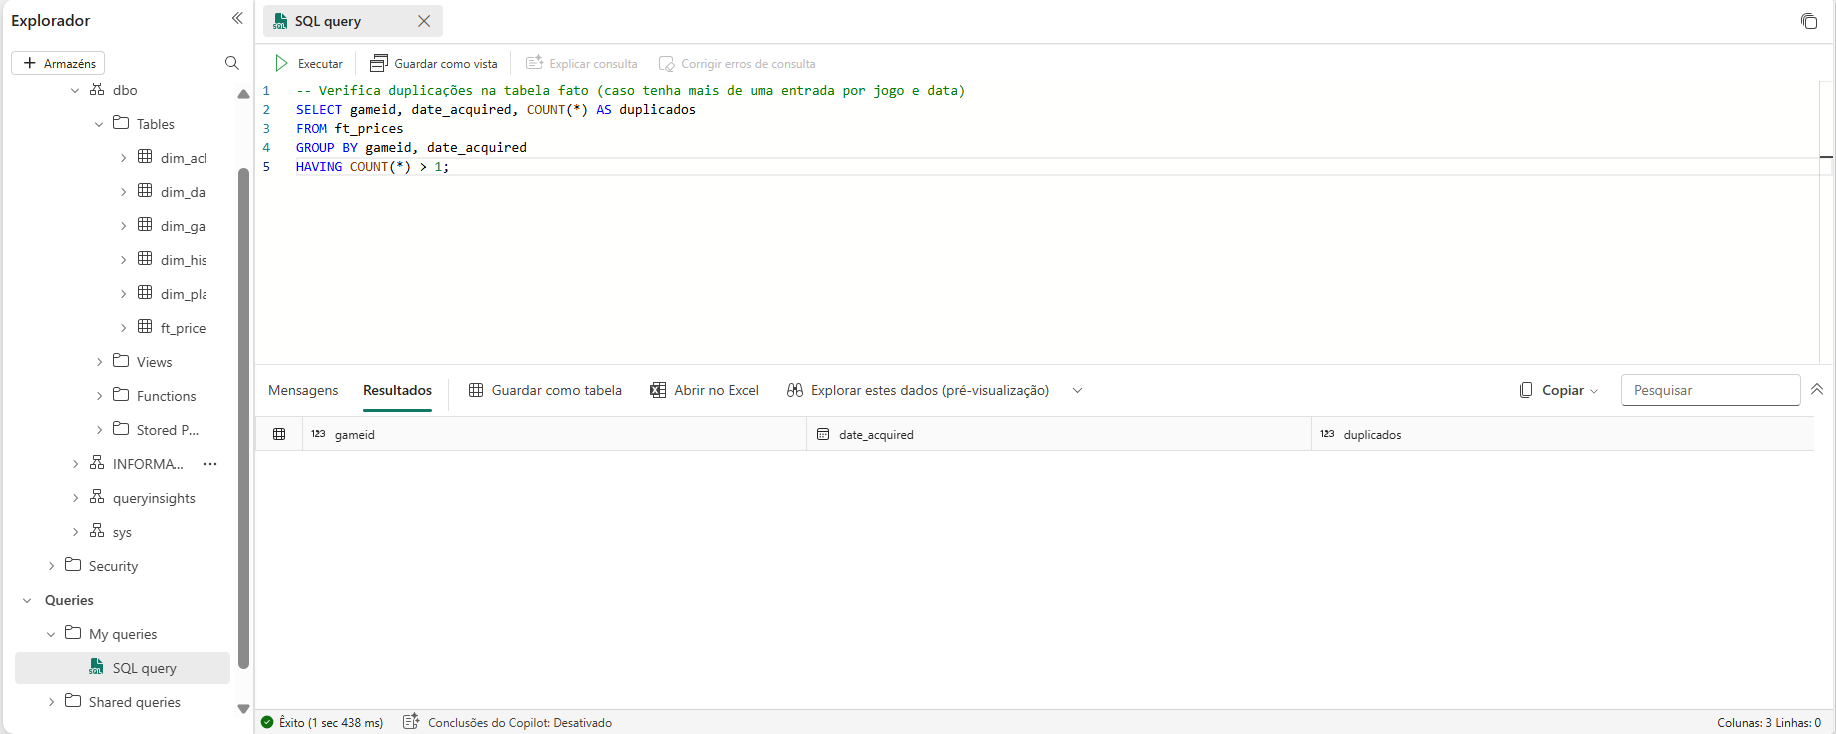

### Solução do problema

#### Descrição

O objetivo desta etapa é analisar as perguntas definidas anteriormente com base nos dados tratados e estruturado, buscando responder o objetivo central proposto no projeto.

Por meio de consultas SQL aplicadas ao modelo dimensional, cada pergunta contém sua resposta e explicação. Com isso, foi possível avaliar hipóteses, identificar padrões e refletir criticamente sobre o comportamento dos jogadores e seu possível impacto no mercado de jogos digitais.

#### Perguntas

#####**Pergunta 1:** Jogos com mais troféus custam mais caro?

######  Consulta SQL utilizada:

In [ ]:
SELECT
    g.gameid,
    g.title,
    COUNT(a.achievementid) AS total_trofeus,
    ROUND(AVG(f.usd), 2) AS preco_medio_usd
FROM ft_prices f
JOIN dim_achievements a ON f.gameid = a.gameid
JOIN dim_games g ON g.gameid = f.gameid
GROUP BY g.gameid, g.title
ORDER BY preco_medio_usd DESC;

A consulta retornou o número total de troféus de cada jogo e seu preço médio em dólar. O objetivo era verificar se jogos com maior quantidade de troféus apresentavam preços mais elevados.

###### Análise de resultado

Após análise dos dados, conclui-se que não há uma correlação direta entre o número de troféus e o preço médio dos jogos.
Foram observados diversos jogos com uma grande quantidade de troféus, mas com preços baixos, o que indica que apenas a quantidade de conquistas não é um fator determinante para o valor do jogo.

Isso reforça a ideia de que outros elementos, como popularidade do título, marketing, gênero ou reputação da desenvolvedora, provavelmente têm mais peso na precificação do que simplesmente a presença de muitos troféus.



#####**Pergunta 2:** A presença de troféus raros (Platinum e Gold) afeta o preço de um jogo?

######  Consulta SQL utilizada:

In [ ]:
SELECT
    f.gameid,
    g.title,
    ROUND(AVG(f.usd), 2) AS preco_medio_usd,
    COUNT(CASE
        WHEN a.rarity IN ('Gold', 'Platinum') THEN 1
        END) AS qtd_trofeus_raros
FROM ft_prices f
JOIN dim_achievements a ON f.gameid = a.gameid
JOIN dim_games g ON g.gameid = f.gameid
GROUP BY f.gameid, g.title
ORDER BY qtd_trofeus_raros DESC;

A consulta analisou a quantidade de troféus com raridade *Gold* e *Platinum* e o preço médio de cada jogo. O objetivo era identificar se jogos com muitos troféus raros têm valores mais altos.

###### Análise de resultado

Com base na análise, foi possível concluir que não há evidência de correlação entre a quantidade de troféus raros e o preço dos jogos.
Alguns jogos com muitos troféus de raridade alta mantêm preços baixos, o que indica que a quantidade conquistas raras não é um fator que impacta diretamente na precificação.

Essa constatação reforça a ideia de que o valor de mercado de um jogo está mais relacionado a fatores como demanda, marca, escopo do jogo e estratégias comerciais, do que com o desafio oferecido aos trophy hunters.



#####**Pergunta 3:** Jogos com mais conquistas desbloqueadas têm preços maiores?

######  Consulta SQL utilizada:

In [ ]:
SELECT
    f.gameid,
    g.title,
    COUNT(h.achievementid) AS total_conquistas_desbloqueadas,
    ROUND(AVG(f.usd), 2) AS preco_medio_usd
FROM ft_prices f
JOIN dim_achievements a ON f.gameid = a.gameid
JOIN dim_games g ON g.gameid = a.gameid
JOIN dim_history h ON a.achievementid = h.achievementid
GROUP BY f.gameid, g.title
ORDER BY total_conquistas_desbloqueadas DESC;

A consulta retornou o total de conquistas desbloqueadas por jogo (com base no histórico dos jogadores) e o preço médio desses jogos em dólar. O objetivo era identificar se maior engajamento dos jogadores resultava em valores mais altos.

###### Análise de resultado

Após análise dos dados, verificou-se que não existe uma relação consistente entre o número de troféus desbloqueados e o preço dos jogos.
Alguns títulos com altíssimo volume de conquistas registradas possuem preços baixos, enquanto outros com pouco engajamento mantêm preços elevados.

Isso indica que o engajamento dos trophy hunters não influencia diretamente o valor de mercado dos jogos.

#####**Pergunta 4:** Gêneros com alta quantidade de troféus apresentam preços mais altos?

######  Consulta SQL utilizada:

In [ ]:
SELECT
    g.genres,
    COUNT(a.achievementid) AS total_trofeus,
    ROUND(AVG(f.usd), 2) AS preco_medio_usd
FROM dim_games g
JOIN dim_achievements a ON g.gameid = a.gameid
JOIN ft_prices f ON g.gameid = f.gameid
GROUP BY g.genres
ORDER BY preco_medio_usd DESC;


A consulta agrupou os jogos por gênero, calculando a quantidade total de troféus e o preço médio dos jogos de cada categoria.

###### Análise de resultado

A análise mostrou que não há correlação entre o número de troféus dentro de um determinado gênero e o preço médio dos jogos pertencentes a esse gênero.

Gêneros populares entre trophy hunters, como *Puzzle* e *Visual Novel*, mesmo quando apresentam uma quantidade elevada de troféus, não demonstram tendência a ter preços superiores.

#####**Pergunta 5:** Existem gêneros com jogos desenvolvidos especialmente para trophy hunters?

######  Consulta SQL utilizada:

In [ ]:
WITH media_trofeus AS (
    SELECT AVG(trofeus_por_jogo) AS media_geral
    FROM (
        SELECT COUNT(a.achievementid) AS trofeus_por_jogo
        FROM dim_games g
        JOIN dim_achievements a ON g.gameid = a.gameid
        GROUP BY g.gameid
    ) sub
)

SELECT
    g.genres,
    COUNT(a.achievementid) AS total_trofeus,
    ROUND(AVG(f.usd), 2) AS preco_medio_usd
FROM dim_games g
JOIN dim_achievements a ON g.gameid = a.gameid
JOIN ft_prices f ON g.gameid = f.gameid
GROUP BY g.genres
HAVING
    COUNT(a.achievementid) > (
        SELECT media_geral * 1.5 FROM media_trofeus
    )
    AND AVG(f.usd) < 5
ORDER BY total_trofeus DESC;


A consulta agrupa os dados por gênero e seleciona apenas os gêneros que:

* Têm um número de troféus acima de 50% da média;

* Possuem preço médio abaixo de 5 dólares.

###### Análise de resultado

A análise revelou que sim, existem gêneros com forte indício de serem voltados ao público trophy hunter. Entre os 5 principais gêneros retornados pela consulta, estavam *Trivia*, *Visual Novel* e *Puzzle*

Esses gêneros são conhecidos por apresentarem jogos mais simples, curtos e com mecânicas repetitivas, facilitando o desbloqueio de troféus. Isso confirma a hipótese de que há um segmento de mercado intencionalmente construído para esse público, onde o apelo dos troféus é o principal atrativo, e não a complexidade ou profundidade do jogo.

## **Conclusão**

O objetivo deste projeto foi investigar se a quantidade de troféus em jogos de PlayStation influencia no preço desses jogos, partindo da hipótese de que o comportamento de jogadores conhecidos como trophy hunters, que buscam ativamente desbloquear conquistas, poderia representar um fator relevante na precificação dos títulos.

Durante o processo de modelagem, análise e validação, diferentes abordagens foram aplicadas para responder a essa hipótese. Avaliou-se:

* A quantidade total de troféus por jogo;
* A raridade dos troféus;
* O engajamento dos jogadores com os troféus (via histórico de desbloqueios);
* A distribuição por gêneros e variações de preço;
* E, por fim, a existência de um nicho de jogos voltados especificamente para trophy hunters.

Com base nas análises realizadas, foi possível concluir que não há evidência de que a quantidade ou raridade de troféus impacte diretamente o preço dos jogos.
Jogos com muitos troféus ou troféus raros podem apresentar preços baixos, enquanto títulos com menos troféus ou menor engajamento podem ter preços elevados, o que sugere que o número de troféus não é um fator determinante na precificação.

No entanto, identificou-se um nicho de mercado voltado especificamente para trophy hunters. Gêneros como Puzzle, Visual Novel e Trivia concentram títulos com preços acessíveis, quantidade elevada de troféus e conquistas facilmente desbloqueáveis. Esses jogos parecem ser projetados não pelo desafio ou complexidade, mas sim para atrair jogadores que buscam aumentar sua contagem de troféus rapidamente.

Essa constatação indica que, embora os troféus não influenciem o preço de forma geral no mercado, existe uma parcela da indústria que explora comercialmente o comportamento dos trophy hunters. Esses jogos atendem a uma demanda específica e, mesmo sendo baratos, podem gerar receita significativa por volume de vendas, justamente por serem otimizados para esse público.

## **Autoavaliação**

Ao finalizar este projeto, acredito ter cumprido com sucesso os objetivos propostos inicialmente, que envolviam a análise da influência dos troféus em jogos de PlayStation sobre seus preços, utilizando técnicas de modelagem dimensional, ETL, análise SQL e exploração de dados no Microsoft Fabric.

Durante o desenvolvimento, enfrentei desafios técnicos relacionados ao carregamento e organização dos dados, especialmente na fase inicial de integração com o lakehouse. Além disso, foi necessário um cuidado especial na construção das consultas analíticas para garantir que os resultados refletissem fielmente a realidade do problema proposto.

Apesar desses desafios, considero que a execução do trabalho foi bem-sucedida, não apenas por responder à pergunta principal do projeto, mas também por trazer descobertas complementares que enriqueceram a análise. Um exemplo disso foi a identificação de um nicho de mercado voltado especificamente para trophy hunters.

Como trabalhos futuros, vejo grande potencial para:

* Ampliar o escopo da análise para outras plataformas, como Xbox e Steam, e verificar se o comportamento identificado se repete em outros ecossistemas de jogos.
* Criar um dashboard interativo em Power BI que consolide as análises desenvolvidas e facilite a visualização dos insights gerados.

Finalizo este projeto com a sensação de ter aprendido muito não apenas sobre engenharia de dados, mas também sobre comportamento de consumo e segmentação de mercado. Essa experiência será incorporada ao meu portfólio como uma amostra prática da aplicação de dados na solução de problemas reais e de negócios.